Iris Data Jupyter Notebook
by Edgar Suarez 

This project demonstrates skillset for combining VS Code, Jupyter Notebook, Markdown, and Python actions. The project utilizes the Iris data set for practice on importing dependencies, working with data frames, cleaning data, and producing visuals. 

The project also shows usage of virtual environment to import and export data via git. 

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Step 1. Data Acquisition

In [39]:
# Load the Iris dataset into DataFrame
df = sns.load_dataset('iris')

# Inspect first rows of the DataFrame
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Step 2. Initial Data Inspection 

In [40]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa
(150, 5)
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


Step 3. Initial Descriptive Statistics

In [41]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Step 4. Initial Data Distribution for Numerical Columns

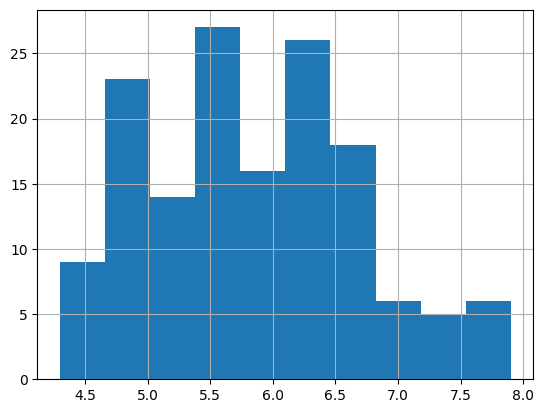

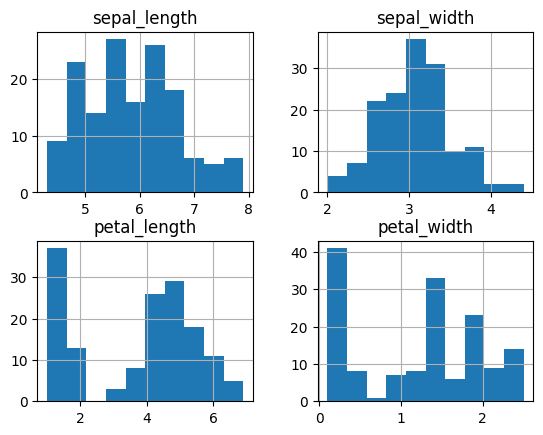

In [42]:
# Inspect histogram by numerical column
df['sepal_length'].hist()

# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

Petal and Sepal, length and width trends correlate with eachother.

Step 5. Initial Data Distribution for Categorical Columns

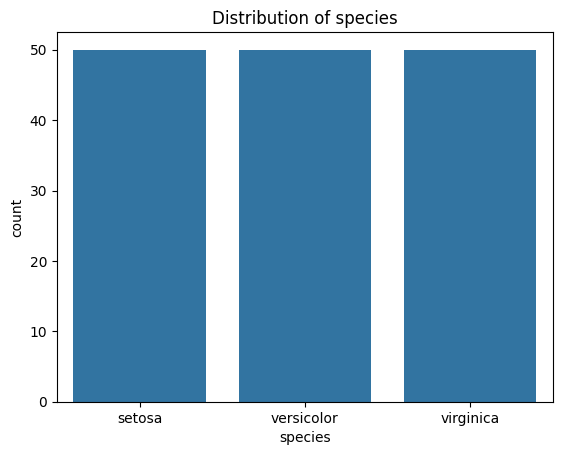

In [43]:
df['species'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()


Species distributions is equal across all 3. 

Step 6. Initial Data Transformation and Feature Engineering

In [44]:
# Renaming a column
df.rename(columns={'species': 'Species','petal_width':'Petal Width','petal_length':'Petal Length','sepal_width':'Sepal Width','sepal_length':'Sepal Length'}, inplace=True)

# Adding a new column
df['Petal Area'] = df['Petal Length'] * df['Petal Width']
df['Sepal Area'] = df['Sepal Length'] * df['Sepal Width']
# verify changes
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species,Petal Area,Sepal Area
0,5.1,3.5,1.4,0.2,setosa,0.28,17.85
1,4.9,3.0,1.4,0.2,setosa,0.28,14.70
2,4.7,3.2,1.3,0.2,setosa,0.26,15.04
3,4.6,3.1,1.5,0.2,setosa,0.30,14.26
4,5.0,3.6,1.4,0.2,setosa,0.28,18.00


Step 7. Visualizations

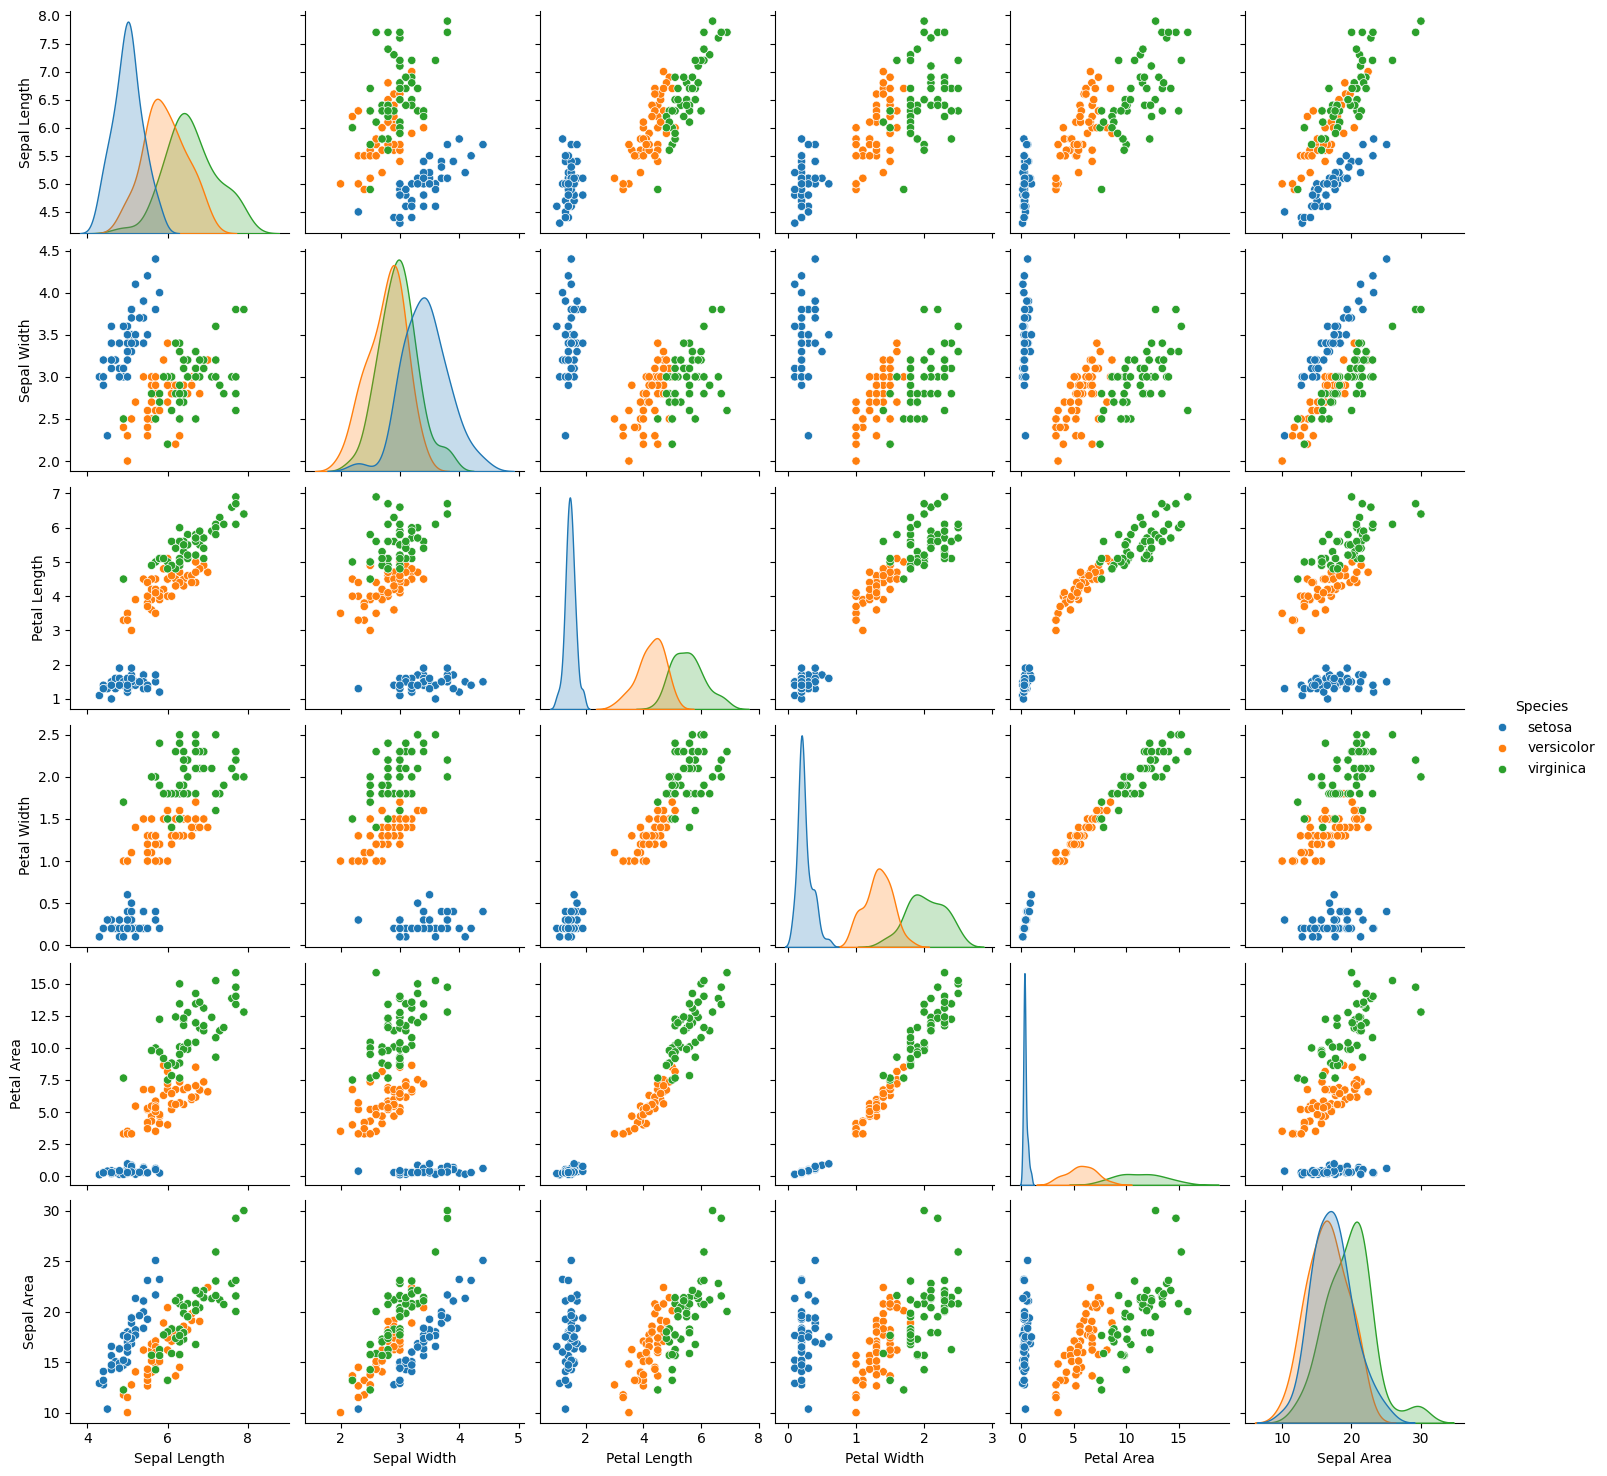

In [45]:
sns.pairplot(df, hue='Species')
plt.show()

<Axes: xlabel='Petal Width', ylabel='Species'>

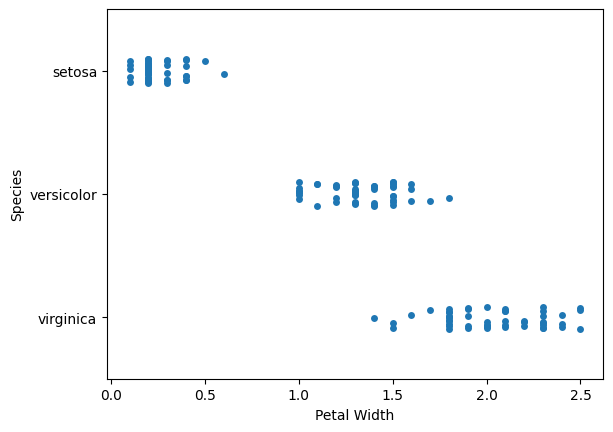

In [55]:
sns.stripplot(data=df, x="Petal Width", y="Species", jitter=True)


This plot shows virginica petal widths are larger than vericolor and setosa. Setosa has the smallest petal width. 

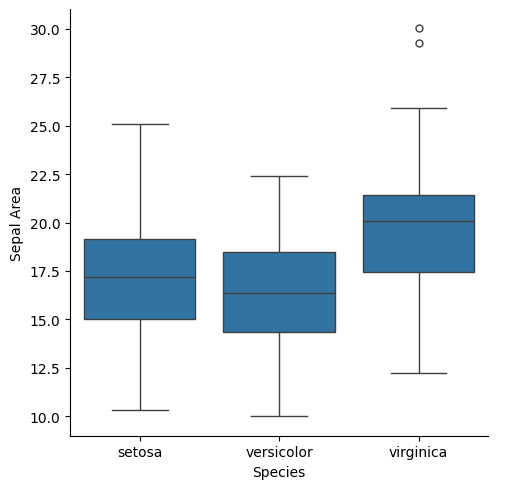

In [59]:
sns.catplot(data=df, x="Species", y="Sepal Area", kind="box")

This plot shows the sepal area distribution between the 3 species. The area distribution is similar, however, viriginica area is larger than the other two species. 

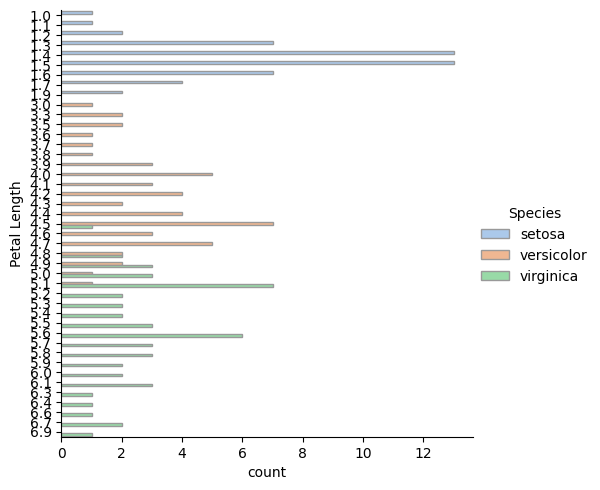

In [60]:
sns.catplot(
    data=df, y="Petal Length", hue="Species", kind="count",
    palette="pastel", edgecolor=".6",
)


Plot shows each animals petal length and how many of had the same length. This also shows Setosa had smallest range of measurements between the 3 species. 

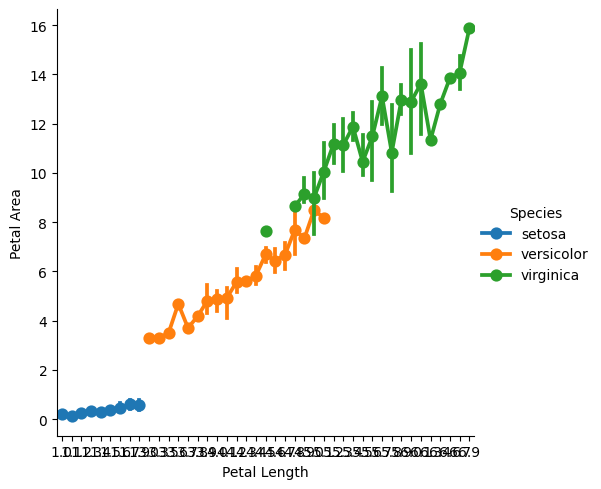

In [71]:
plot = sns.catplot(data=df, x="Petal Length", y="Petal Area", hue="Species", kind="point")


Plot shows minimal distribution of petal length on setosa. Wider distribution of petal length on virginica compared to the other two. 